In [1]:
import os
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import codecs
import nltk
import seaborn as sb
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arodrigues/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arodrigues/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# dirpath = '../AULA02_29012020/TM/'
# output = '../AULA02_29012020/social_network.csv'

# files = os.listdir(dirpath)

# f = Series(files, index=range(len(files)))

# df = DataFrame({'filename':f})
# df['text'] = np.nan

# i = 0
# for filename in files:
#     with open(dirpath+filename,'r') as f:
#         r = f.read() 
# #         print(r)
#         df['text'][i]=r
#         i += 1
#         f.close()
# df.to_csv(output)

# df = pd.read_csv(output)

# count = df.text.str.split().str.len()
# dropped = df[~(count>2)].copy()
# dropped.index.tolist()
# df.drop(dropped.index.tolist(), axis=0, inplace=True)
# df.drop(columns=['Unnamed: 0'], inplace=True)

# df

In [3]:
dirpath = '../AULA02_29012020/TM/'
output = '../AULA02_29012020/social_network.csv'

files = [f for f in os.listdir(dirpath) if os.path.isfile(os.path.join(dirpath, f)) and f.endswith('.txt')]

f = Series(files, index=range(len(files)))

df = DataFrame({'filename':f})

df['text'] = np.nan



for i in range(len(df)):
    with open(dirpath + df['filename'][i],'r') as f:
        r = f.read() 
        df['text'][i]=r
        f.close()
        
df.to_csv(output, index=False)

df = pd.read_csv(output)

df

,filename,text
0,Debora_2.txt,São você acredita que a rede social digital EL...
1,Debora_3.txt,De.Você acredita que as redes sociais digitais...
2,Paulo_Audio1_MP3.txt,Eu acredito que sim city e as medias sociais. ...
3,Alex04-MP3.txt,Eu acho que não necessariamente eu acho que el...
4,Debora_1.txt,O ano em que você acredita que as redes sociai...
5,audiomp3.txt,É ver que em que sim porque o extremismo na é ...
6,Paulo_Audio3_MP3.txt,De. Bom eu acho que as redes sociais ajudam si...
7,WhatsApp Ptt 2020-01-24 at 12.36.44_wav.txt,Acho que as sanções municiados por que elas pa...
8,WhatsApp Ptt 2020-01-24 at 22.04.57.mp3.txt,﻿É eu acredito que sim que ajudo sem a. A torn...
9,audio2_wav.txt,Pior. É a questão é você acredita que as redes...


## 2) Checking for missing values
**É fácil checar missing values usando método isnull() com o método sum(), o número retornado condiz com a quantidade True para o teste, ou seja, quantidade de valores nulos nas variaveis**

In [4]:
df.isnull().sum()

filename    0
text        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
filename    54 non-null object
text        54 non-null object
dtypes: object(2)
memory usage: 992.0+ bytes


#### b) Passando todos caracteres para letra minúscula

In [6]:
df['text'] = df.text.apply(lambda texto: texto.lower())
df.head()

,filename,text
0,Debora_2.txt,são você acredita que a rede social digital el...
1,Debora_3.txt,de.você acredita que as redes sociais digitais...
2,Paulo_Audio1_MP3.txt,eu acredito que sim city e as medias sociais. ...
3,Alex04-MP3.txt,eu acho que não necessariamente eu acho que el...
4,Debora_1.txt,o ano em que você acredita que as redes sociai...


## 3)Aplicando NLP

### Mostrar as 10 palavras que mais ocorrem antes de eliminar as stop words

In [7]:
from collections import Counter
c = Counter()

In [8]:
df.text.str.lower().str.split(" ")

0     [são, você, acredita, que, a, rede, social, di...
1     [de.você, acredita, que, as, redes, sociais, d...
2     [eu, acredito, que, sim, city, e, as, medias, ...
3     [eu, acho, que, não, necessariamente, eu, acho...
4     [o, ano, em, que, você, acredita, que, as, red...
5     [é, ver, que, em, que, sim, porque, o, extremi...
6     [de., bom, eu, acho, que, as, redes, sociais, ...
7     [acho, que, as, sanções, municiados, por, que,...
8     [﻿é, eu, acredito, que, sim, que, ajudo, sem, ...
9     [pior., é, a, questão, é, você, acredita, que,...
10    [de, ano., ontem., a, mídia, lá, vem, notifica...
11    [vamos, é, vamos, lago, ao, de., bons, é, uma,...
12    [﻿acho, que, as, sanções, municiados, por, que...
13    [com., cara, eu, acha, sim, porque, erro, gale...
14    [eu, acredito, que, sim, as, redes, sociais, p...
15    [acredito, que, as, redes, sociais, digitais, ...
16    [sim, acredito, que, as, ressocializar, de, ta...
17    [sim, eu, acredito, que, as, redes, sociai

In [9]:
df.isna().sum()

filename    0
text        0
dtype: int64

In [10]:
df.text.str.lower().str.split(" ").apply(c.update)
c.most_common(10)

[('que', 429),
 ('de', 319),
 ('a', 295),
 ('é', 270),
 ('e', 233),
 ('o', 165),
 ('as', 158),
 ('não', 133),
 ('um', 127),
 ('mais', 116)]

### Nuvem de palavras antes do stop word

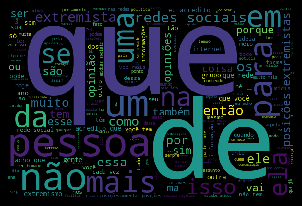

In [11]:
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    
pos_words = ''

for val in df.text:
    text = val.lower()
    for words in text:
        pos_words = pos_words + words
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=600, height=400).generate(pos_words)

#Livro Word cloud
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Stop Words

In [12]:
stopwords = nltk.corpus.stopwords.words('portuguese')
# stopwords

In [13]:
df['stop'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df.head()

,filename,text,stop
0,Debora_2.txt,são você acredita que a rede social digital el...,acredita rede social digital ajuda aumentar po...
1,Debora_3.txt,de.você acredita que as redes sociais digitais...,de.você acredita redes sociais digitais podem ...
2,Paulo_Audio1_MP3.txt,eu acredito que sim city e as medias sociais. ...,acredito sim city medias sociais. certeza favo...
3,Alex04-MP3.txt,eu acho que não necessariamente eu acho que el...,acho necessariamente acho ele. fato ter exposi...
4,Debora_1.txt,o ano em que você acredita que as redes sociai...,ano acredita redes sociais digitais podem aume...


In [14]:
import string

trans_table = {ord(x): None for x in string.punctuation + string.digits}    

def tokenize(text):
        # Remover pontuação e dígitos de qualquer palavra com pelo menos dois caracteres. 
        tokens = [word for word in nltk.word_tokenize(text.translate(trans_table), language="portuguese") if len(word) > 1] #if len(word) > 1 
        tokens = " ".join(tokens)
        return tokens
    
df['stop'] = df['stop'].apply(lambda x: (tokenize(x)))
df.head()

,filename,text,stop
0,Debora_2.txt,são você acredita que a rede social digital el...,acredita rede social digital ajuda aumentar po...
1,Debora_3.txt,de.você acredita que as redes sociais digitais...,devocê acredita redes sociais digitais podem a...
2,Paulo_Audio1_MP3.txt,eu acredito que sim city e as medias sociais. ...,acredito sim city medias sociais certeza favor...
3,Alex04-MP3.txt,eu acho que não necessariamente eu acho que el...,acho necessariamente acho ele fato ter exposiç...
4,Debora_1.txt,o ano em que você acredita que as redes sociai...,ano acredita redes sociais digitais podem aume...


In [15]:
df.isna().sum()

filename    0
text        0
stop        0
dtype: int64

### Mostrar as 10 palavras que mais ocorrem depois de eliminar as stop words

In [16]:
from collections import Counter
c = Counter()

In [17]:
df.stop.str.lower().str.split(" ")

0     [acredita, rede, social, digital, ajuda, aumen...
1     [devocê, acredita, redes, sociais, digitais, p...
2     [acredito, sim, city, medias, sociais, certeza...
3     [acho, necessariamente, acho, ele, fato, ter, ...
4     [ano, acredita, redes, sociais, digitais, pode...
5     [ver, sim, porque, extremismo, vem, longa, dat...
6     [de, bom, acho, redes, sociais, ajudam, sim, a...
7     [acho, sanções, municiados, passam, tempo, red...
8     [﻿é, acredito, sim, ajudo, tornara, opiniões, ...
9     [pior, questão, acredita, redes, sociais, digi...
10    [ano, ontem, mídia, lá, vem, notificando, múlt...
11    [vamos, vamos, lago, de, bons, dissesse, podem...
12    [﻿acho, sanções, municiados, passam, tempo, re...
13    [com, cara, acha, sim, porque, erro, galera, f...
14    [acredito, sim, redes, sociais, podem, aumenta...
15    [acredito, redes, sociais, digitais, ajudam, a...
16    [sim, acredito, ressocializar, tais, ajudem, a...
17    [sim, acredito, redes, sociais, tais, ajud

In [18]:
df.text.head(10)

0    são você acredita que a rede social digital el...
1    de.você acredita que as redes sociais digitais...
2    eu acredito que sim city e as medias sociais. ...
3    eu acho que não necessariamente eu acho que el...
4    o ano em que você acredita que as redes sociai...
5    é ver que em que sim porque o extremismo na é ...
6    de. bom eu acho que as redes sociais ajudam si...
7    acho que as sanções municiados por que elas pa...
8    ﻿é eu acredito que sim que ajudo sem a. a torn...
9    pior. é a questão é você acredita que as redes...
Name: text, dtype: object

In [19]:
df.stop.str.lower().str.split(" ").apply(c.update)
c.most_common(10)

[('pessoas', 114),
 ('sociais', 79),
 ('extremistas', 64),
 ('redes', 54),
 ('então', 48),
 ('posições', 45),
 ('opinião', 38),
 ('ser', 38),
 ('vai', 37),
 ('acredito', 32)]

## Nuvem de palavras com Stop Words aplicado

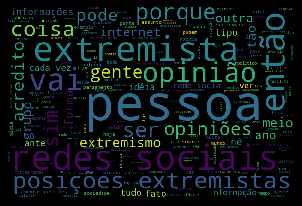

In [20]:
import nltk
import matplotlib.pyplot as plt

try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    
pos_words = ''

for val in df.stop:
    text = val.lower()
    for words in text:
        pos_words = pos_words + words
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=600, height=400).generate(pos_words)

#Livro Word cloud
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()